In [100]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error


In [101]:
# leitura dos dados com pandas
df = pd.read_csv('winequality.csv',sep=";")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [102]:
# Excluindo outliers na coluna alcohol
for i in df["alcohol"]:
    try:
        float(i)
    except:
        df = df[df.alcohol != i]

In [103]:
df_white = df[df.type == "White"]

In [104]:
df_red = df[df.type == "Red"]

In [105]:
df = df.drop(["type"], axis=1)

In [106]:
#Verificando os valores missing no dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [107]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000
mean,7.219475,0.339684,0.318795,5.445973,0.056081,30.495586,115.690801,1.715329,3.218592,0.531169,5.817098
std,1.294910,0.164690,0.145506,4.764308,0.035110,17.757007,56.595196,7.659497,0.160845,0.148870,0.874125
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [108]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


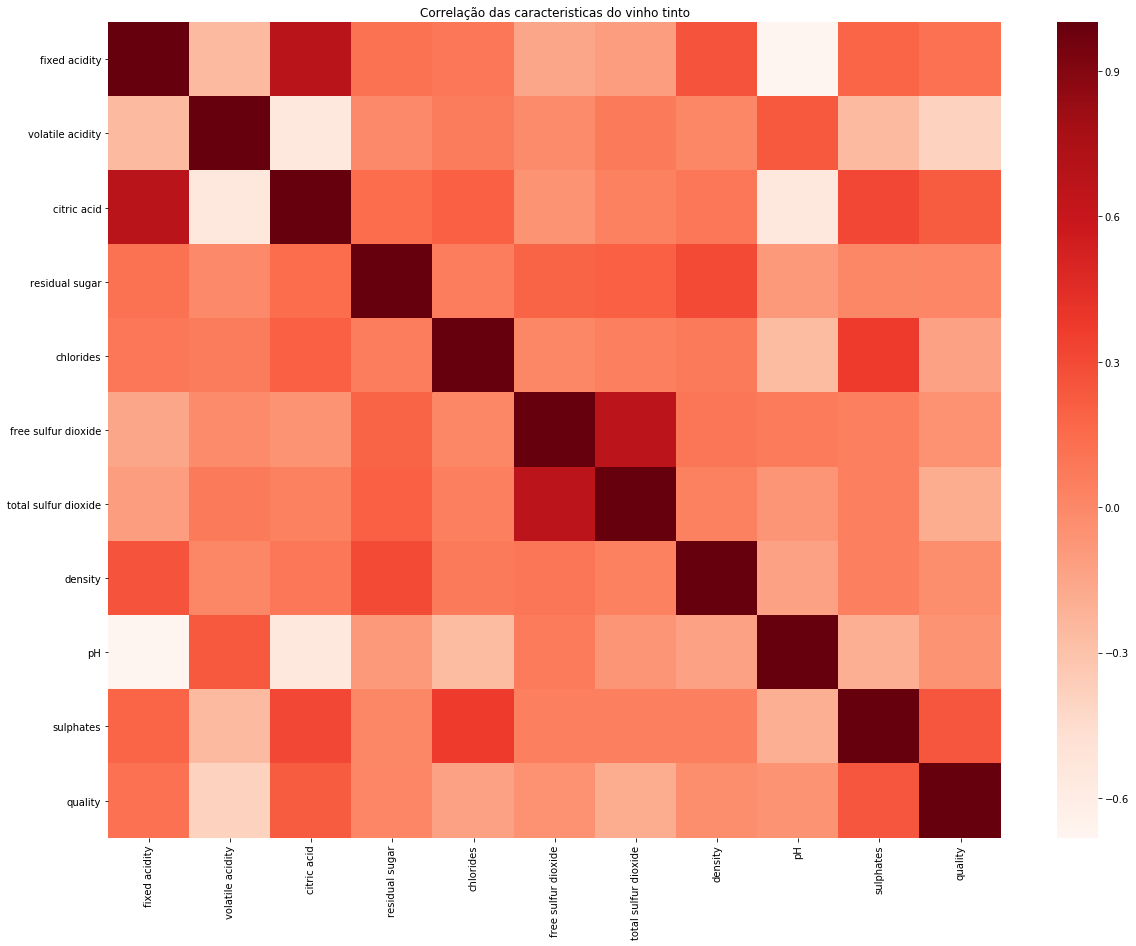

In [109]:
#Correlação Heat Maps 
# Vinho tinto
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlação das caracteristicas do vinho tinto")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

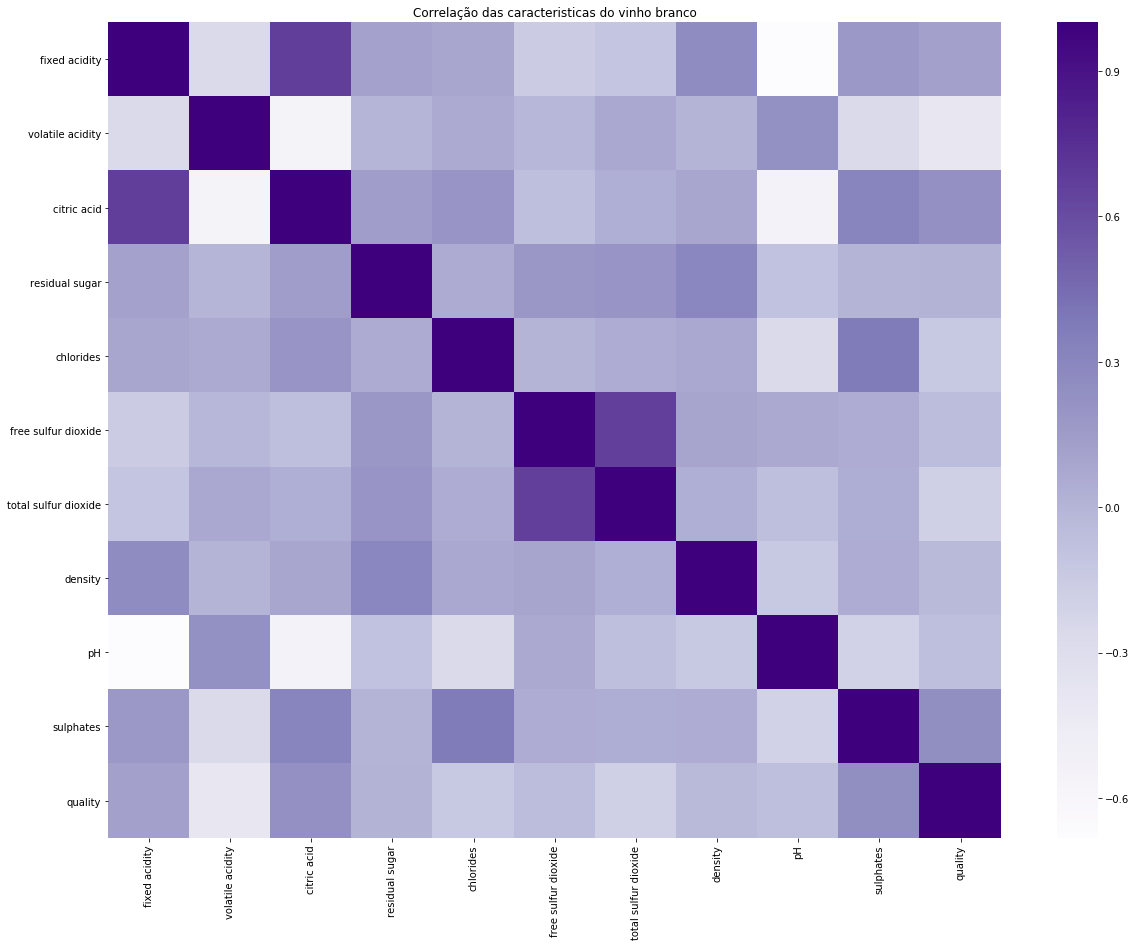

In [110]:
#Vinho Branco
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlação das caracteristicas do vinho branco")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")

In [111]:
# Ao analisar a correlação podemos notar algumas diferenças na interação das variáveis  com a variedade do vinho.
# Quanto mais escuro for o quadrado maior é a diferença entre vinhos tintos e brancos
df_r_corr=df_red.corr()
df_w_corr=df_white.corr()


In [112]:
diff_corr = df_r_corr - df_w_corr

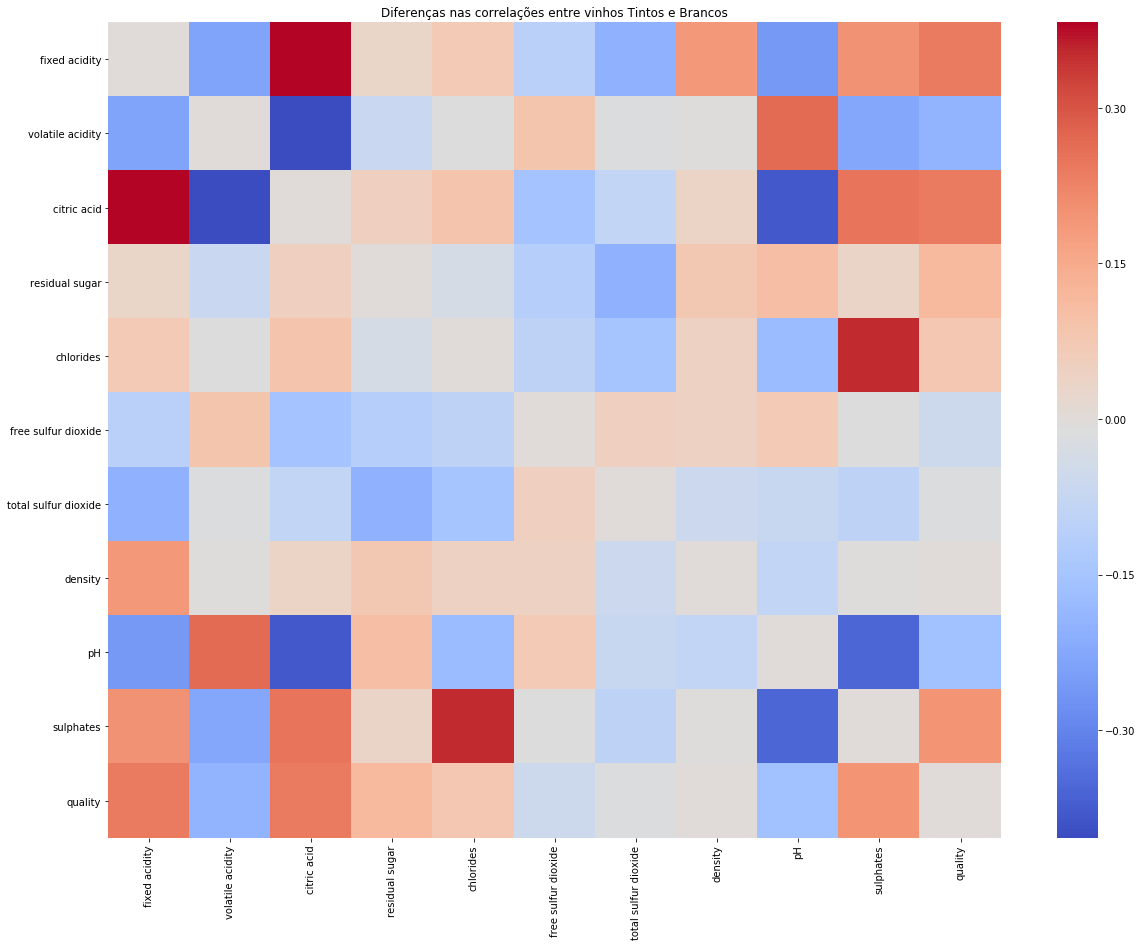

In [113]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Diferenças nas correlações entre vinhos Tintos e Brancos")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

In [114]:
# Predição da qualidade do vinho: Regressão Linear


In [115]:
df.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [116]:
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [117]:
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [150]:
# 80 - treinamento 
# 20 - testes 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=4) 

In [151]:
y = train["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","sulphates","pH","alcohol","density"]
X=train[cols]

In [152]:
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
ytrain_pred = regr.predict(X)
print("Erro quadrático médio na amostra: %.2f"
      % mean_squared_error(y, ytrain_pred))
mse = mean_squared_error(y, ytrain_pred)
rmse = np.sqrt(mean_squared_error(y, ytrain_pred))
print(mse/rmse)

Erro quadrático médio na amostra: 0.54
0.7352936352079353


In [122]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","sulphates","pH","alcohol","density"]

Xtest=test[cols]

In [123]:
ypred = regr.predict(Xtest)
print("Erro quadrático médio fora da amostra: %.2f"
      % mean_squared_error(ytest, ypred))

Erro quadrático médio fora da amostra: 0.55


In [124]:
# 60 - treinamento 
# 40 - testes 

In [125]:
train2, test2 = train_test_split(df, test_size=0.4, random_state=4)

In [126]:
y2 = train2["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","sulphates","pH","alcohol","density"]
X2=train2[cols]
regr.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
ytrain_pred2 = regr.predict(X2)
print("Erro quadrático médio na amostra: %.2f"
      % mean_squared_error(y2, ytrain_pred2))

Erro quadrático médio na amostra: 0.55


In [128]:
ytest2 = test2["quality"]
Xtest2=test2[cols]

In [129]:
ypred2 = regr.predict(Xtest2)
print("Erro quadrático médio fora da amostra: %.2f"
      % mean_squared_error(ytest2, ypred2))

Erro quadrático médio fora da amostra: 0.54


In [130]:
# Segmentando os dados 
# Modelo para vinho branco
# 80 - treinamento 
# 20 - testes 

w_train, w_test = train_test_split(df_white, test_size=0.2)

In [131]:
y_w = w_train["quality"]
cols_w = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","sulphates","pH","alcohol","density"]
X_w=w_train[cols_w]
regr.fit(X_w,y_w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
ytrain_predw = regr.predict(X_w)
print("Erro quadrático médio na amostra: %.2f"
      % mean_squared_error(y_w, ytrain_predw))

Erro quadrático médio na amostra: 0.58


In [133]:
ytestw = w_test["quality"]
Xtestw = w_test[cols_w]
ypredw = regr.predict(Xtestw)
print("Erro quadrático médio fora da amostra: %.2f"
      % mean_squared_error(ytestw, ypredw))

Erro quadrático médio fora da amostra: 0.54


In [134]:
# Modelo para vinho tinto
# 80 - treinamento 
# 20 - testes 
r_train, r_test = train_test_split(df_red, test_size=0.2)

In [135]:
y_r = r_train["quality"]
cols_r = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_r=r_train[cols_r]
regr.fit(X_r,y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
ytrain_predr = regr.predict(X_r)
print("Erro quadrático médio na amostra: %.2f"
      % mean_squared_error(y_r, ytrain_predr))

Erro quadrático médio na amostra: 0.41


In [137]:
ytestr = r_test["quality"]
Xtestr = r_test[cols_r]
ypredr = regr.predict(Xtestr)
print("Erro quadrático médio fora da amostra: %.2f"
      % mean_squared_error(ytestr, ypredr))

Erro quadrático médio fora da amostra: 0.52


In [138]:
# Combinando os resultados 
y_both = pd.concat([y_w,y_r])

In [139]:
ytrain_predW=pd.DataFrame(ytrain_predw)
ytrain_predR=pd.DataFrame(ytrain_predr)

y_train_predboth = pd.concat([ytrain_predW,ytrain_predR])

In [140]:
print("Erro quadrático médio na amostra: %.2f"
      % mean_squared_error(y_both, y_train_predboth))

Erro quadrático médio na amostra: 0.54


In [141]:
ytestboth = pd.concat([ytestw,ytestr])
Xtestboth = pd.concat([Xtestw,Xtestr])
                                          
ypredboth = pd.concat([pd.DataFrame(ypredw),pd.DataFrame(ypredr)])
print("Erro quadrático médio fora da amostra: %.2f"
      % mean_squared_error(ytestboth, ypredboth))

Erro quadrático médio fora da amostra: 0.53
